In [1]:
import json
import requests
import pandas as pd
from pandas.io.json import json_normalize
from datetime import datetime
import numpy as np
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

# writing a function to convert the time stamps
def time_conversion(row):
    time_string = datetime.fromtimestamp(row['time']).strftime('%B %d, %Y at %I:%M%p')
    return time_string

# the function which makes the request
def make_request(url):
    # make the request
    request = requests.get(url)
    results = request.json()
    
    return results

'''
Returns a dataframe given the request result, if the request was successful.

Else, does nothing.
'''
def extractResults(result):
    if(result['Response'] == "Success"):
        data = result['Data']['Data']
        df = json_normalize(data)
        
    return df

'''
Prints basic dataframe summary info.
'''
def showDFSummary(df):
    print(df.info())
    print(df.describe())
    print(df.tail())
    df.plot(figsize=(10, 12), subplots=True)
    return 0


# function which does all of the work
def load_data(curr1 = "BTC", curr2 = "USD"):
    # initial parameters of the the ping
    # curr1 = "BTC"
    # curr2 = "USD"
    limit = 2000
    api_key = "291dfa65131f748afb1cded83569256b81f3d6025ff1f2d6a6f522889c30b190"
    
     # Concatenate the string
    url = "https://min-api.cryptocompare.com/data/v2/histohour?fsym=" + str(curr1) + "&tsym=" + str(curr2) + "&limit=" + str(limit) + "&api_key=" + api_key
    
    # calling the support method
    results = make_request(url)
    df = extractResults(results)
    last_timestamp = df['time'][0]

    n = 20
    while(n > 0):
        url = "https://min-api.cryptocompare.com/data/v2/histohour?fsym=" + str(curr1) + "&tsym=" + str(curr2) + "&limit=" + str(limit) + "&toTs=" + str(last_timestamp) + "&api_key=" + api_key
        results = make_request(url)
        df_tmp = extractResults(results)
        df = df.append(df_tmp, ignore_index = True)
        last_timestamp = df_tmp['time'][0]
        n = n - 1

    # now using a lambda function to apply the function over the array
    df['trade_time'] = df.apply(lambda row: time_conversion(row), axis=1)
    
    # creating the string label for the currency pair
    label = curr1 + "/" + curr2

    # now labeling the pairs
    df['pair_label'] = df.apply(lambda row: label, axis = 1)
    
    return df

In [2]:
# calling the load_data() function for BTC and usd
df_btc = load_data("BTC", "USD")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42021 entries, 0 to 42020
Data columns (total 11 columns):
time                42021 non-null int64
high                42021 non-null float64
low                 42021 non-null float64
open                42021 non-null float64
volumefrom          42021 non-null float64
volumeto            42021 non-null float64
close               42021 non-null float64
conversionType      42021 non-null object
conversionSymbol    42021 non-null object
trade_time          42021 non-null object
pair_label          42021 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 3.5+ MB
None
               time          high           low          open    volumefrom  \
count  4.202100e+04  42021.000000  42021.000000  42021.000000  4.202100e+04   
mean   1.502402e+09   4131.595563   4084.660605   4108.922200  4.107259e+03   
std    4.364825e+07   3982.185417   3925.055393   3954.676633  6.244014e+04   
min    1.426802e+09      0.001579      0.

0

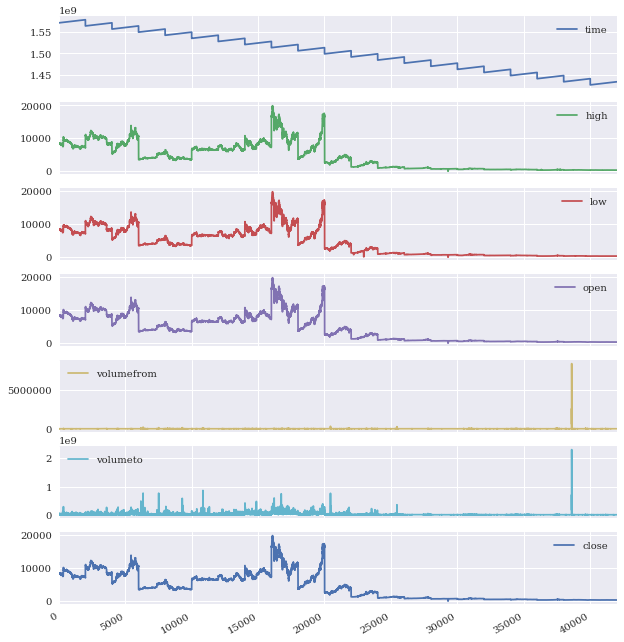

In [3]:
# get summary of the data
showDFSummary(df_btc)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42021 entries, 0 to 42020
Data columns (total 11 columns):
time                42021 non-null int64
high                42021 non-null float64
low                 42021 non-null float64
open                42021 non-null float64
volumefrom          42021 non-null float64
volumeto            42021 non-null float64
close               42021 non-null float64
conversionType      42021 non-null object
conversionSymbol    42021 non-null object
trade_time          42021 non-null object
pair_label          42021 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 3.5+ MB
None
               time          high           low          open    volumefrom  \
count  4.202100e+04  42021.000000  42021.000000  42021.000000  4.202100e+04   
mean   1.502402e+09    187.796371    185.120927    186.493064  5.080344e+04   
std    4.364825e+07    239.695390    235.418710    237.658876  5.890459e+04   
min    1.426802e+09      0.000000      0.

0

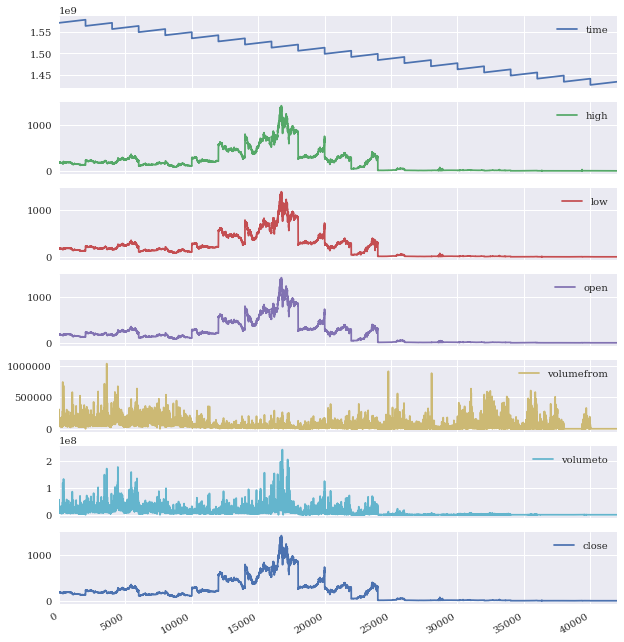

In [4]:
# calling the load_data() function for ETH and usd
df_eth = load_data("ETH", "USD")

# looking at a summary of the data
showDFSummary(df_eth)

In [5]:
df_btc.to_csv("btc_hourly.csv")

In [6]:
df_eth.to_csv("eth_hourly.csv")